imports

In [1]:
import dataLoader
from configParser import ConfigParser

params

In [2]:
# defining global variables
experimentName = "test_22987_suffix50_11_CNN2_differentConfig_softmax_multi"
experimentName2 = None # "test_22987_suffix50_11_splitTest_3"
list_of_sizes_of_interest = [] # 20,50,100

params = ConfigParser(experimentName).read()
print(params)
if experimentName2 is not None:
    params2 = ConfigParser(experimentName2).read()
    print(params2)

{'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'imageDimension': 224, 'n_channels': 3, 'augmentation': False, 'batchSize': 550, 'n_epochs': 1000, 'learning_rate': 0.0001, 'numOfTrials': 3, 'patience': 100, 'useHierarchy': True, 'useRelu': True, 'downsample': True, 'downsampleOutput': 50, 'takeFromIntermediate': True, 'takeFromIntermediateOutput': 50, 'fc_layers': 1, 'useAdam': True, 'resnet': '18', 'normalize': False, 'softmax': False}


pre-defined strings

In [3]:
cleaned_species_csv_fileName = "cleaned_metadata.csv"
species_csv_fileName_header = "fileName"
species_csv_scientificName_header = "scientificName"
species_csv_Genus_header = "Genus"
species_csv_Family_header = "Family"
image_subpath = "images"
species_csv_usedColumns = [species_csv_fileName_header,
                          species_csv_scientificName_header,
                          species_csv_Genus_header,
                          species_csv_Family_header]

Create dataset

In [4]:
datasetManager = dataLoader.datasetManager(experimentName)
datasetManager.updateParams(params)
dataset = datasetManager.getDataset()

file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_CNN2_differentConfig_softmax_multi/tc0.640000_vc0.160000_d224_c3_augFalse_nFalse/dataset.pkl read


try to reload dataset

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

dataset = datasetManager.getDataset()
speciesList = dataset.getSpeciesList()
numberOfSpecies = len(speciesList)
print("Number of species = ", numberOfSpecies)
genusList = dataset.getGenusList()
numberOfGenus = len(genusList)
print("Number of species = ", numberOfGenus)

Number of species =  11
Number of species =  5


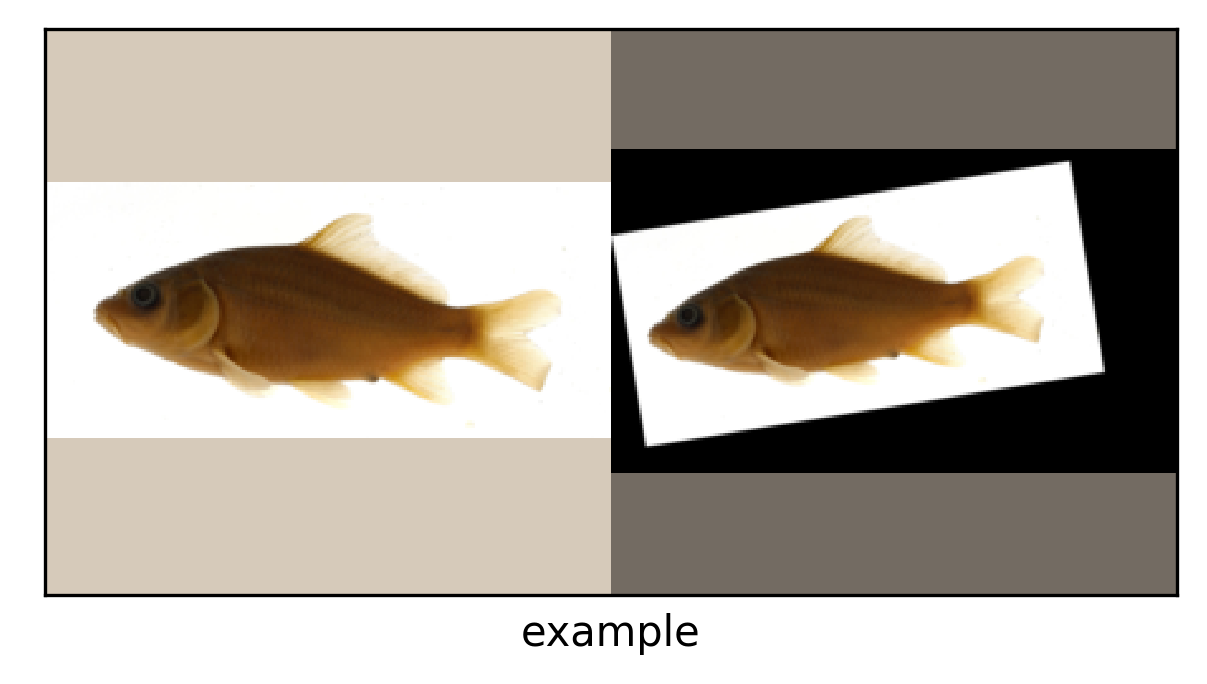

In [6]:
# parameter
example_index = 10

import torch

fig, axes = plt.subplots(1, 1, figsize=(15, 2.5), dpi= 300)
axes.set_xlabel("example")
augmentation, normalization = dataset.toggle_image_loading(augmentation=False, normalization=False)
speciesExample = dataset[example_index]['image'].squeeze()
dataset.toggle_image_loading(augmentation, normalization)
augmentation, normalization = dataset.toggle_image_loading(augmentation=True, normalization=False)
speciesExample2 = dataset[example_index]['image'].squeeze()
dataset.toggle_image_loading(augmentation, normalization)

n_channels = params["n_channels"]
channel = 2 if n_channels != 1 else 1
stitchedImage = torch.cat((speciesExample, speciesExample2), channel)

if n_channels != 1:
    stitchedImage = stitchedImage.permute(1, 2, 0)
axes.set_xticks([])
axes.set_yticks([])
axes.imshow(stitchedImage.cpu().detach().numpy())


Try to reload dataset with changed params

In [7]:
if experimentName2 is not None:
    datasetManager = dataLoader3.datasetManager(experimentName2)
    datasetManager.updateParams(params2)
    dataset = datasetManager.getDataset()
    numberOfSpecies = len(speciesList)
    print("Number of species = ", numberOfSpecies)

Try same experiment but different dataset params

In [8]:
if experimentName2 is not None:
    params2['patience'] = 1000
    print(params2)
    datasetManager.updateParams(params2)
    dataset = datasetManager.getDataset()
    numberOfSpecies = len(speciesList)
    print("Number of species = ", numberOfSpecies)

Get old dataset back

In [9]:
dataset = datasetManager.getDataset()

In [10]:
datasetManager = dataLoader.datasetManager(experimentName)
datasetManager.updateParams(params)
dataset = datasetManager.getDataset()
print(speciesList)

file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_CNN2_differentConfig_softmax_multi/tc0.640000_vc0.160000_d224_c3_augFalse_nFalse/dataset.pkl read
['Lepomis cyanellus', 'Lepomis auritus', 'Carassius auratus', 'Cyprinus carpio', 'Esox americanus', 'Esox lucius', 'Noturus gyrinus', 'Noturus exilis', 'Noturus flavus', 'Noturus eleutherus', 'Noturus insignis']


Data Loader

In [11]:
train_loader, validation_loader, test_loader = datasetManager.getLoaders()

trainingFileNames = []
valFileNames = []
testFileNames = []

for batch in train_loader:
    print(batch['species'])
    print(batch['fileName'])

file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_CNN2_differentConfig_softmax_multi/trainingIndex.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_CNN2_differentConfig_softmax_multi/valIndex.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_CNN2_differentConfig_softmax_multi/testIndex.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_CNN2_differentConfig_softmax_multi/tc0.640000_vc0.160000_d224_c3_augFalse_nFalse/trainingLoader.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_CNN2_differentConfig_softmax_multi/tc0.640000_vc0.160000_d224_c3_augFalse_nFalse/valLoader.pkl written
file /data/BGNN_data/INHS_cropped/50_11/test_22987_suffix50_11_CNN2_differentConfig_softmax_multi/tc0.640000_vc0.160000_d224_c3_augFalse_nFalse/testLoader.pkl written
tensor([10,  2, 10,  5,  9,  1,  6,  4, 10,  1,  8,  8,  7, 10,  0,  6,  3,  0,
         4,  0,  6,  0,  2,  2,  1,  3, 10, 10,  7,  

In [12]:
for batch in validation_loader:
    print(batch['species'])
    print(batch['fileName'])

tensor([ 2, 10,  7,  7,  2, 10,  8,  9,  2,  0,  3,  0,  6,  8,  9,  4, 10,  9,
         2,  9,  3,  3,  1,  0,  5,  6, 10,  5,  4,  4,  2,  5,  5,  4,  1,  8,
         9,  4,  6,  0,  1,  2,  7,  6,  1,  8,  8, 10,  6,  4,  8, 10, 10,  0,
         9,  3,  6,  9,  5,  7,  0,  2,  6,  7,  2,  0,  6,  8, 10,  4,  5,  1,
         9,  7,  1,  3,  8,  3,  5,  5,  7,  4,  0,  3,  7,  1,  3,  1])
['INHS_FISH_025698.jpg', 'INHS_FISH_29618.jpg', 'INHS_FISH_85012.jpg', 'INHS_FISH_89702.jpg', 'INHS_FISH_33737.jpg', 'INHS_FISH_27267.jpg', 'INHS_FISH_12762.jpg', 'INHS_FISH_53547.jpg', 'INHS_FISH_5124.jpg', 'INHS_FISH_2930.jpg', 'INHS_FISH_19369.jpg', 'INHS_FISH_98964.jpg', 'INHS_FISH_99351.jpg', 'INHS_FISH_23032.jpg', 'INHS_FISH_59010.jpg', 'INHS_FISH_84741.jpg', 'INHS_FISH_49738.jpg', 'INHS_FISH_101493.jpg', 'INHS_FISH_88453.jpg', 'INHS_FISH_64079.jpg', 'INHS_FISH_20480.jpg', 'INHS_FISH_103780.jpg', 'INHS_FISH_59426.jpg', 'INHS_FISH_93197.jpg', 'INHS_FISH_91796.jpg', 'INHS_FISH_59719.jpg', 'INHS_F

In [13]:
for batch in test_loader:
    print(batch['species'])
    print(batch['fileName'])

tensor([ 0,  8,  5, 10,  6,  0,  2,  5,  4,  5,  3,  3,  9, 10,  6,  4,  2,  2,
         0,  1,  2,  7,  1,  9,  6,  0,  1,  6,  9, 10,  1,  5,  2,  8, 10,  3,
         9,  6,  9,  9,  7,  1,  5,  4,  0,  8,  2,  2, 10,  8,  3,  2,  0,  5,
         6,  7,  1,  4,  7, 10,  8,  3,  0,  4,  4,  4,  7,  1,  4,  1,  2, 10,
        10,  5,  0,  7,  7,  6,  6,  7,  3,  0,  2,  5,  9,  8,  9,  7,  3,  5,
         5,  1,  6,  4,  8,  8,  3,  9, 10,  3,  3, 10,  4,  8,  7,  0,  8,  6,
         1,  9])
['INHS_FISH_51437.jpg', 'INHS_FISH_102623.jpg', 'INHS_FISH_4297.jpg', 'INHS_FISH_29612.jpg', 'INHS_FISH_85232.jpg', 'INHS_FISH_3026.jpg', 'INHS_FISH_4916.jpg', 'INHS_FISH_26975.jpg', 'INHS_FISH_63090.jpg', 'INHS_FISH_64109.jpg', 'INHS_FISH_7761.jpg', 'INHS_FISH_89664.jpg', 'INHS_FISH_9867.jpg', 'INHS_FISH_74146.jpg', 'INHS_FISH_7021.jpg', 'INHS_FISH_95243.jpg', 'INHS_FISH_25607.jpg', 'INHS_FISH_29399.jpg', 'INHS_FISH_51409.jpg', 'INHS_FISH_62927.jpg', 'INHS_FISH_75313.jpg', 'INHS_FISH_86350.jpg', '

Try to reload dataloader. You should get same indices.

In [14]:
train_loader, validation_loader, test_loader = datasetManager.getLoaders()

In [15]:
for batch in train_loader:
    print(batch['species'])
    print(batch['fileName'])

tensor([10,  9, 10,  6,  6,  0,  9,  6,  6, 10,  3,  3,  2,  0,  9,  5,  8, 10,
        10,  2,  8,  1,  7,  5,  1,  2,  9,  8,  0,  5,  5,  2,  5,  1,  8,  6,
         4,  0,  7,  4,  9,  4,  3,  4,  5,  3,  3,  4,  7,  4,  9,  1,  9,  5,
         0,  5,  8,  7,  0,  8,  5,  8,  0, 10,  3,  9,  0,  4,  8,  0,  8, 10,
         4,  0,  5,  5,  0,  1,  6,  2,  2,  0,  3,  8,  2,  1,  1,  9,  5,  1,
         9, 10,  3,  1,  6,  0, 10,  3,  1, 10,  1,  6,  3, 10,  4,  4,  7,  4,
        10,  6,  5,  9,  0,  1,  3,  2,  4,  2,  0,  4,  8,  0,  5,  5,  1,  1,
         9,  4,  6,  9,  8,  0,  7,  1,  2,  0,  9,  5,  6,  6,  9,  2,  0,  8,
         7,  7,  8,  6,  0,  5,  2,  7,  4,  8,  5,  8,  3,  8,  5,  4,  3,  9,
         7,  8,  5,  8,  6,  5,  4,  4,  0,  4,  6,  0,  6,  3,  4, 10,  3, 10,
         1, 10,  2,  0,  4,  2,  7,  5,  5,  0,  1,  7,  5,  6,  4,  8,  9,  7,
         9,  1,  1,  8,  0, 10,  9,  6,  1,  6, 10, 10,  5,  7,  9, 10,  5,  5,
         9, 10,  2,  8, 10,  3,  2,  3, 

Plot information about the dataset

        scientificName  count
0    Carassius auratus     50
1      Cyprinus carpio     50
2      Esox americanus     50
3          Esox lucius     50
4      Lepomis auritus     50
5    Lepomis cyanellus     50
6   Noturus eleutherus     50
7       Noturus exilis     50
8       Noturus flavus     50
9      Noturus gyrinus     50
10    Noturus insignis     50


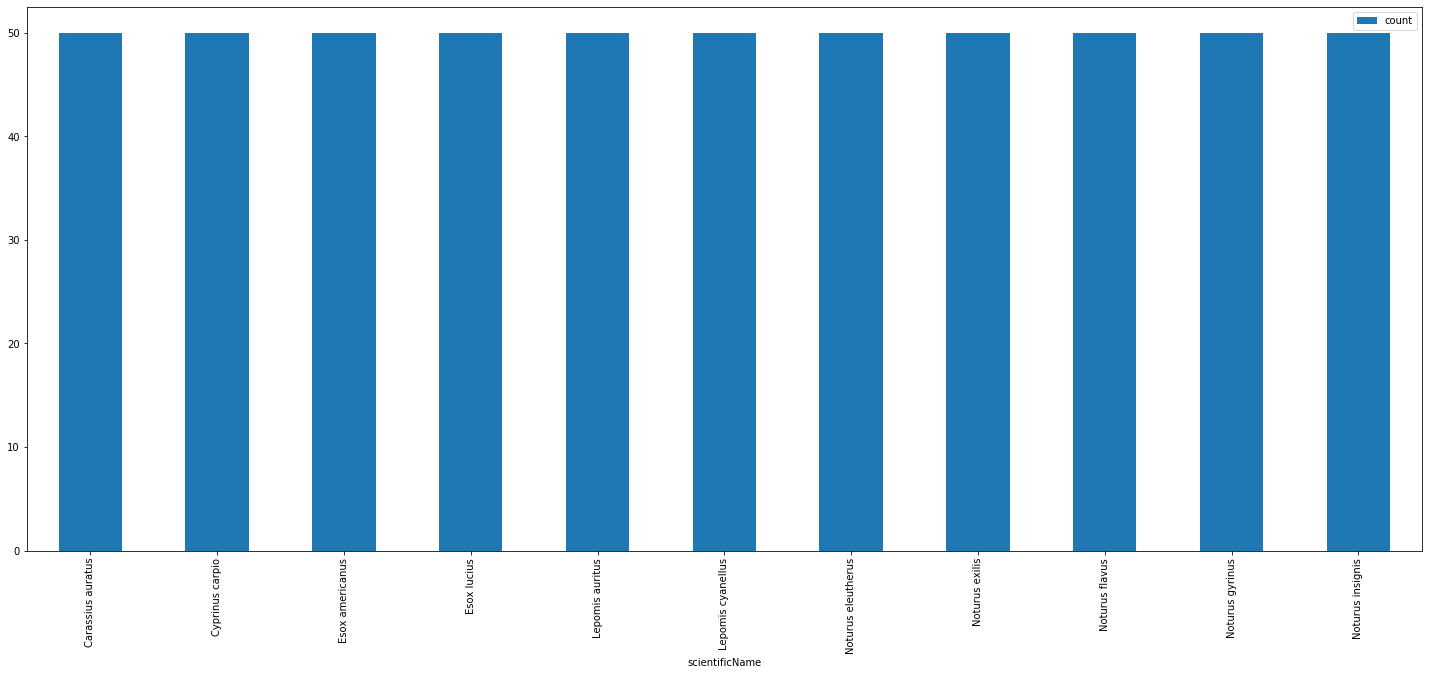

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

suffix = str(params["suffix"]) if ("suffix" in params and params["suffix"] is not None) else ""

full_path = os.path.join(params["image_path"], suffix, "count_per_species.csv")
species_count_table = pd.read_csv(full_path).rename(columns={species_csv_fileName_header: "count"})
print(species_count_table)
species_count_table.plot.bar(x=species_csv_scientificName_header, y='count', rot=90, figsize=(25, 10))
plt.savefig(os.path.join(params["image_path"], suffix, "count_per_species.pdf"))

          Family      Genus  count
1     Cyprinidae  Carassius     50
2     Cyprinidae   Cyprinus     50
0  Centrarchidae    Lepomis    100
3       Esocidae       Esox    100
4    Ictaluridae    Noturus    250
               count
Family              
Centrarchidae    100
Cyprinidae       100
Esocidae         100
Ictaluridae      250


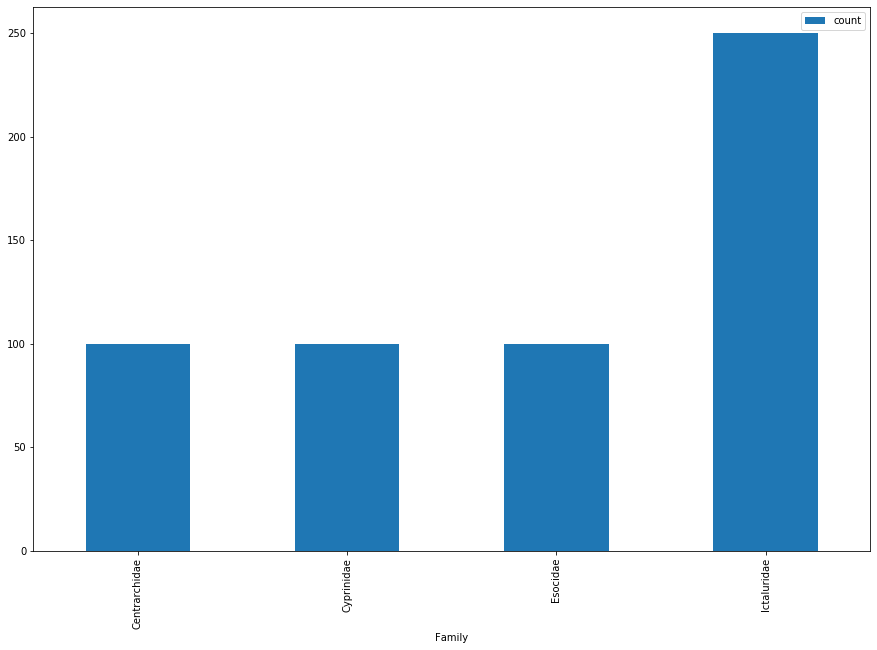

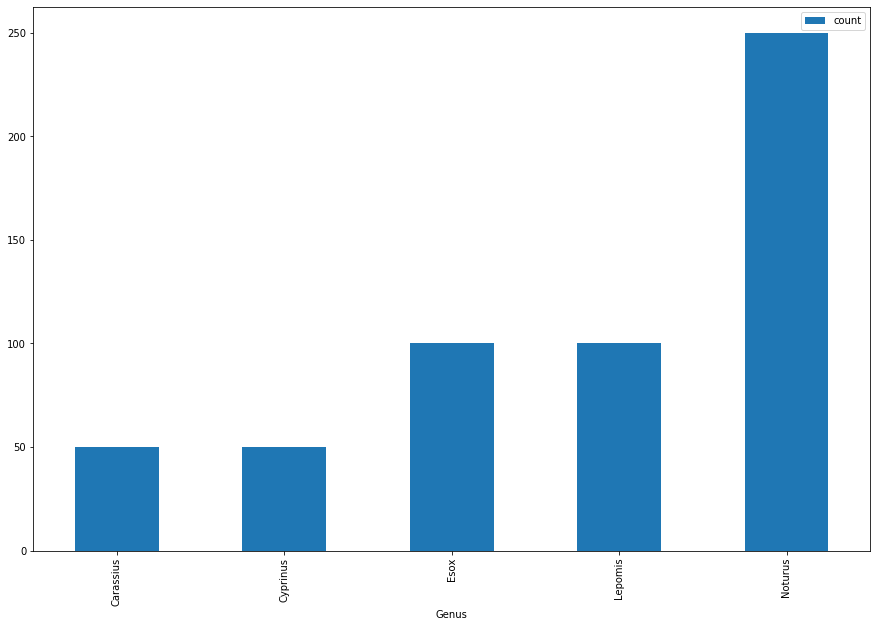

In [17]:
full_path = os.path.join(params["image_path"], suffix, "count_per_family_genis.csv")
family_genis_count_table = pd.read_csv(full_path).rename(columns={species_csv_fileName_header: "count"}).sort_values(by=['count'])
print(family_genis_count_table)
print(family_genis_count_table.groupby(species_csv_Family_header).agg('sum').sort_values(by=['count']))
family_genis_count_table.groupby(species_csv_Family_header).agg('sum').sort_values(by=['count']).plot.bar(rot=90, figsize=(15, 10))
plt.savefig(os.path.join(params["image_path"], suffix, 'count_per_family.pdf'))
family_genis_count_table.groupby(species_csv_Genus_header).agg('sum').sort_values(by=['count']).plot.bar(rot=90, figsize=(15, 10))
plt.savefig(os.path.join(params["image_path"], suffix, 'count_per_genis.pdf'))

Get count matrix

Genus               Carassius  Cyprinus  Esox  Lepomis  Noturus
scientificName                                                 
Carassius auratus          50         0     0        0        0
Cyprinus carpio             0        50     0        0        0
Esox americanus             0         0    50        0        0
Esox lucius                 0         0    50        0        0
Lepomis auritus             0         0     0       50        0
Lepomis cyanellus           0         0     0       50        0
Noturus eleutherus          0         0     0        0       50
Noturus exilis              0         0     0        0       50
Noturus flavus              0         0     0        0       50
Noturus gyrinus             0         0     0        0       50
Noturus insignis            0         0     0        0       50


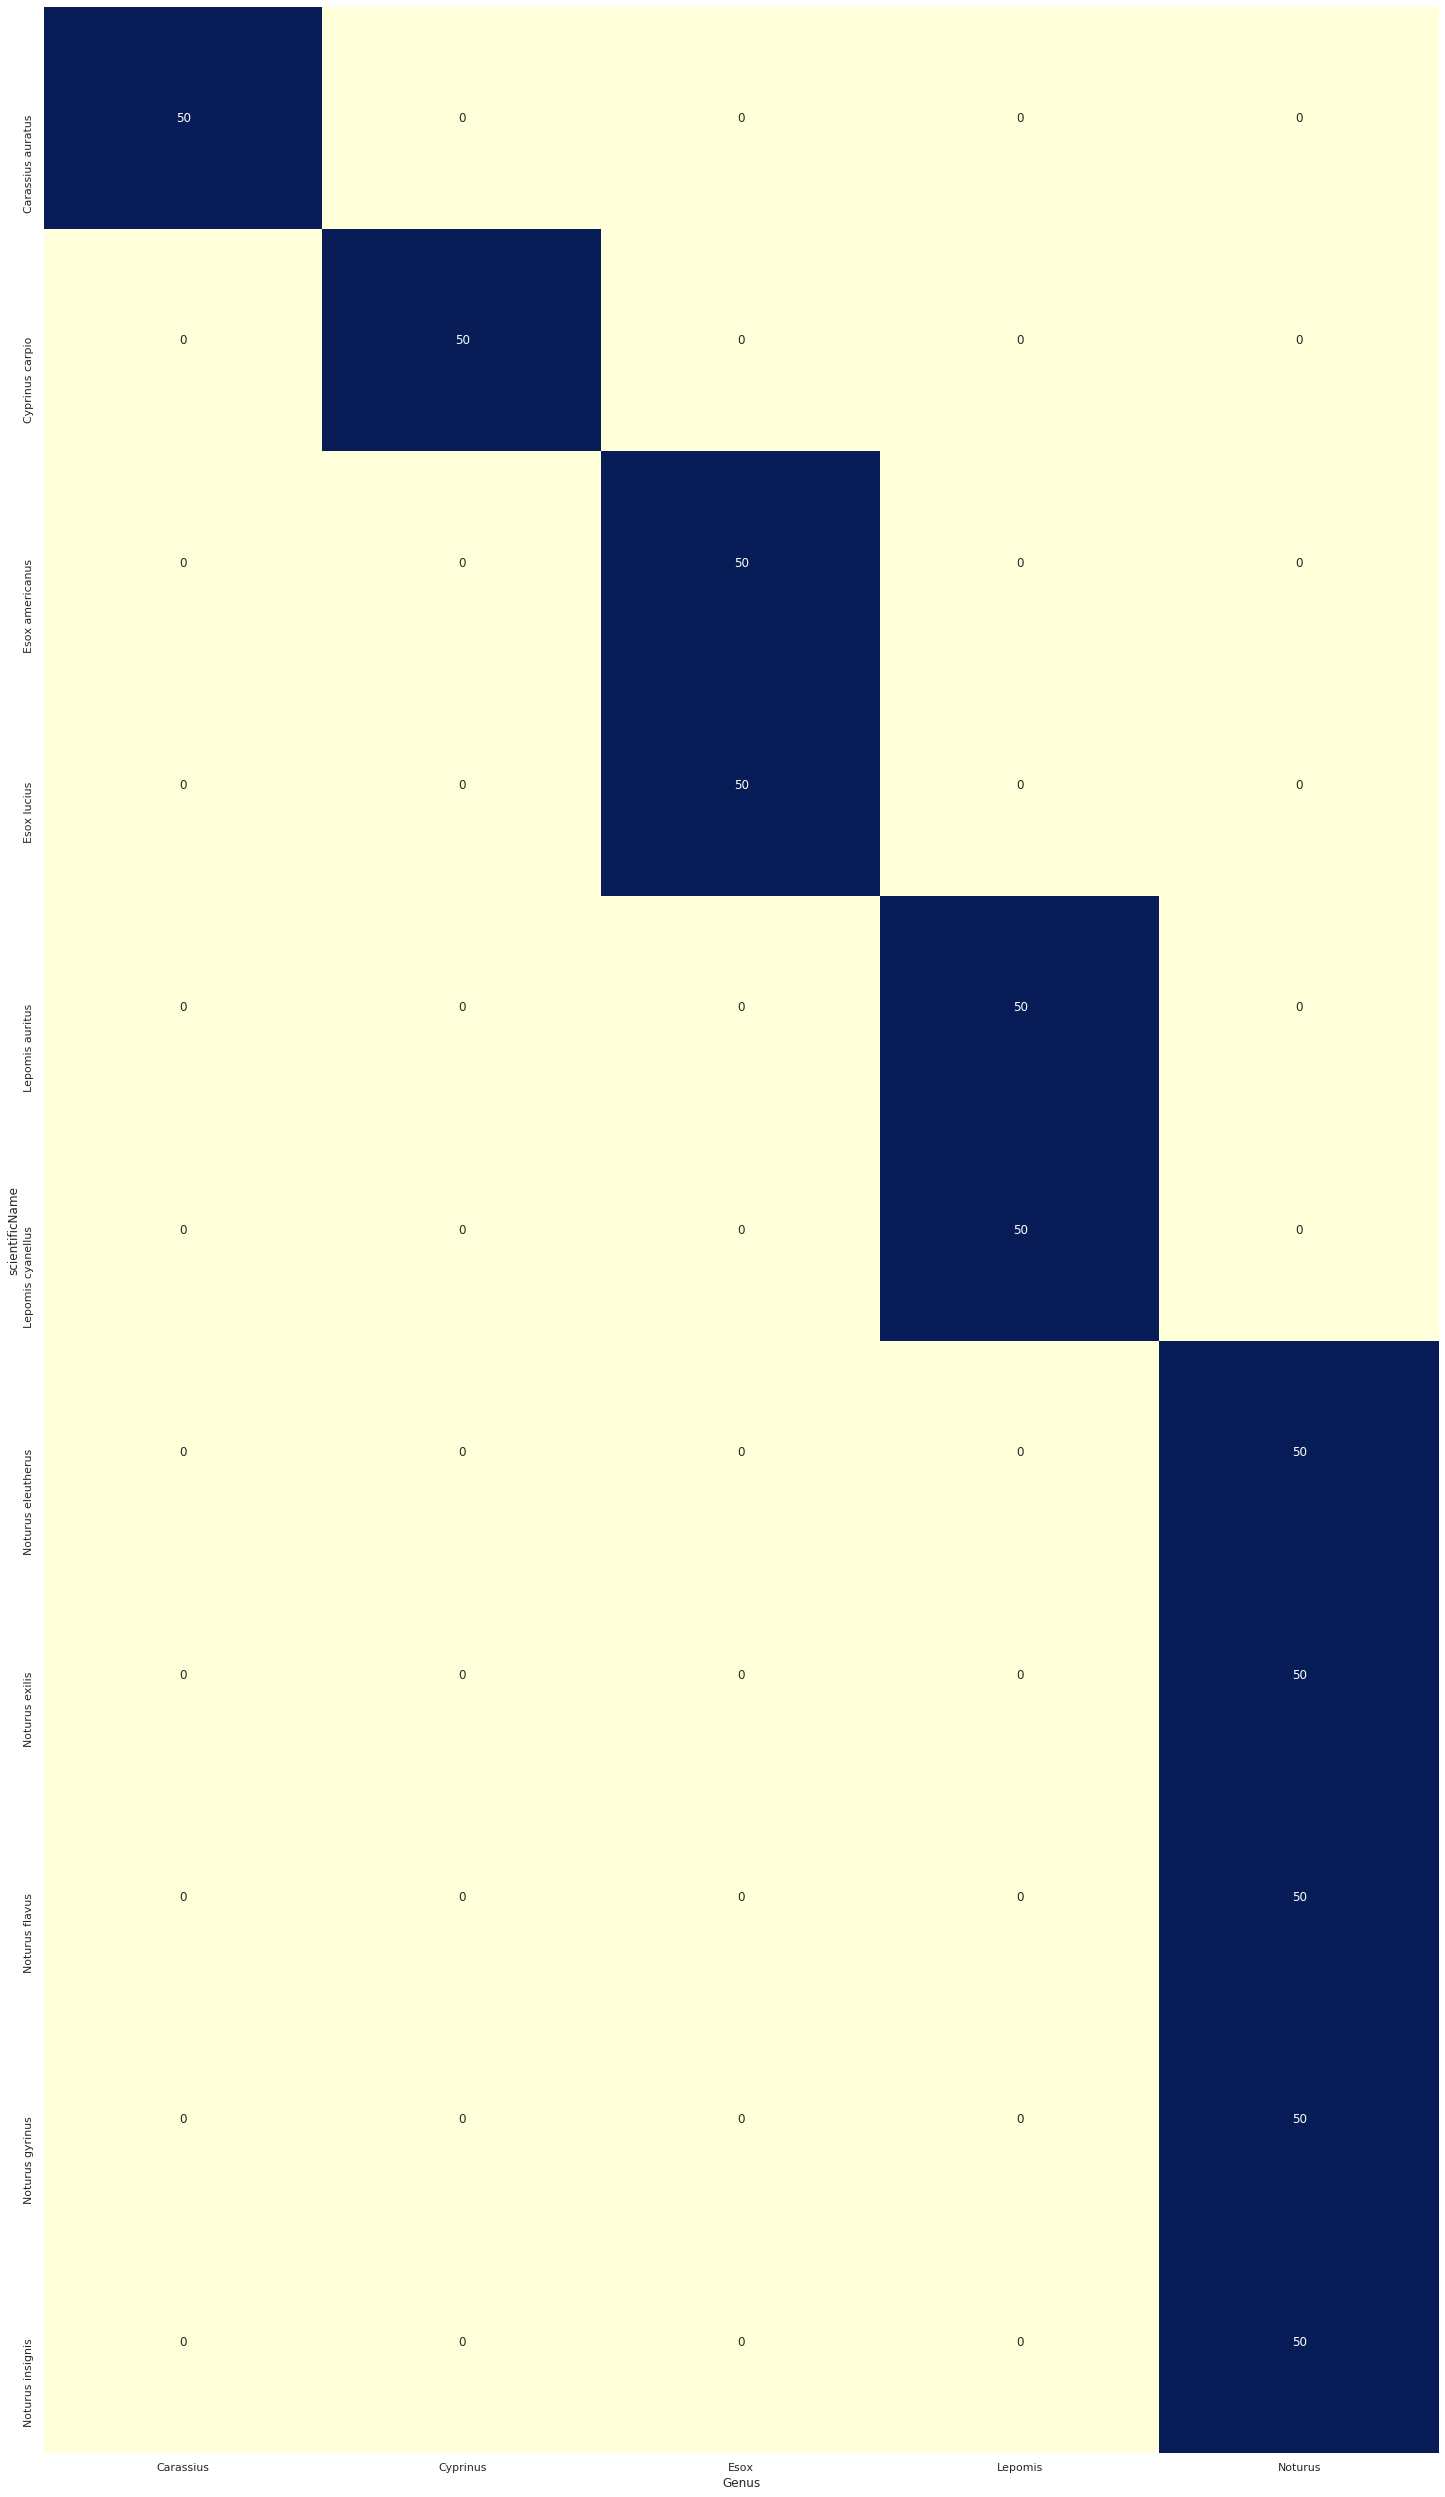

In [18]:
import numpy as np
import seaborn as sns; sns.set()

cleaned_metadata = pd.read_csv(os.path.join(params["image_path"], suffix, cleaned_species_csv_fileName), sep='\t')
species_genis_matrix = cleaned_metadata.groupby([species_csv_scientificName_header, species_csv_Genus_header]).size().unstack(fill_value=0)

print(species_genis_matrix)
fig, ax = plt.subplots(figsize=(25,45))
sns.heatmap(species_genis_matrix, annot=True, fmt="d", ax=ax, cmap="YlGnBu", cbar=False)
plt.savefig(os.path.join(params["image_path"], suffix , 'species_genis_matrix.pdf'))
species_genis_matrix.to_csv(os.path.join(params["image_path"], suffix, 'species_genis_matrix.csv'), sep='\t')

Get most frequent Genuses and clip them to a certain size

In [19]:
import os
for size in list_of_sizes_of_interest:
    sub_path = os.path.join(params["image_path"], str(size))
    if not os.path.exists(sub_path):
            os.makedirs(sub_path)
    # find species with image count more than a threshold
    genus_groupedby_species = cleaned_metadata.groupby([species_csv_Genus_header, species_csv_scientificName_header]).filter(lambda x: x[species_csv_fileName_header].count() >= size)
    genus_groupedby_species = genus_groupedby_species.groupby([species_csv_Genus_header, species_csv_scientificName_header]).agg(len).rename(columns={species_csv_fileName_header: "count"})['count']
    print("\nSpecies of sample size", size)
    print(genus_groupedby_species)
    # get n top for each species
    species_list = genus_groupedby_species.reset_index()['scientificName'].unique()
    trimmed_cleaned_metadata = cleaned_metadata.loc[cleaned_metadata[species_csv_scientificName_header].isin(species_list)].groupby(species_csv_scientificName_header).head(size)
    print(trimmed_cleaned_metadata)
    trimmed_cleaned_metadata.to_csv(os.path.join(sub_path, cleaned_species_csv_fileName), sep="\t", index=False)
    



Get image size statistics

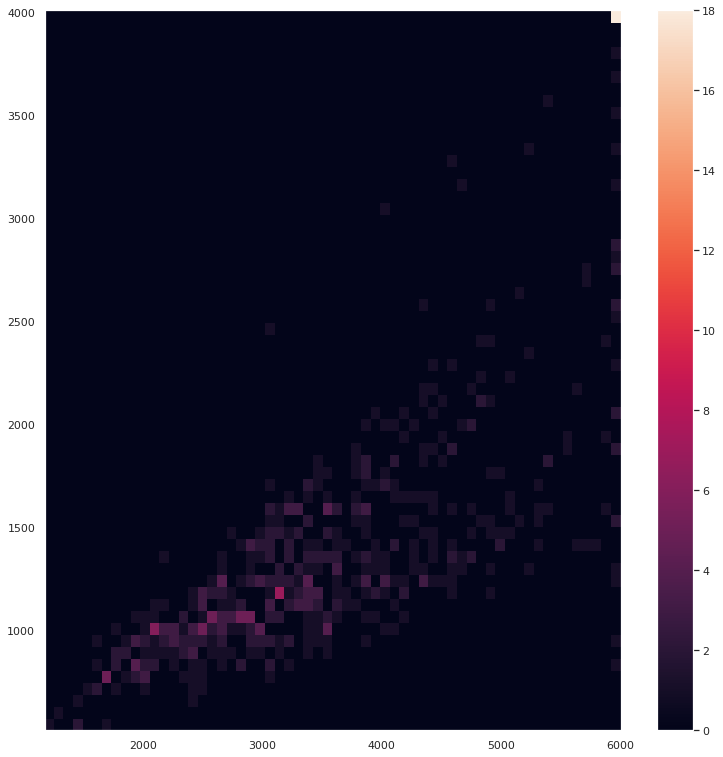

In [20]:
import PIL
from PIL import Image

# Get params
data_root = params["image_path"]
suffix = str(params["suffix"]) if ("suffix" in params and params["suffix"] is not None) else ""

# Get file
cleaned_species_csv_fileName_withsuffix = cleaned_species_csv_fileName
cleaned_species_csv_fileName_full_path = os.path.join(data_root, suffix, cleaned_species_csv_fileName_withsuffix)
cleaned_species_csv_file_exists = os.path.exists(cleaned_species_csv_fileName_full_path)
species_csv = pd.read_csv(cleaned_species_csv_fileName_full_path, delimiter='\t', index_col=species_csv_fileName_header, usecols=species_csv_usedColumns)
img_count = len(species_csv.index)

# Get image sizes
width=[]
height=[]
for indx, row in species_csv.iterrows(): 
    image = PIL.Image.open(os.path.join(data_root,image_subpath,indx))
    w, h = image.size
    width.append(w)
    height.append(h)

# plot histogram
plt.figure(figsize=(10, 10))
plt.hist2d(width, height, bins=60)
plt.subplots_adjust(bottom=0, top=1, left=0, right=1)
plt.colorbar()
plt.show()

Print images per species (visual verification)

['Lepomis cyanellus', 'Lepomis auritus', 'Carassius auratus', 'Cyprinus carpio', 'Esox americanus', 'Esox lucius', 'Noturus gyrinus', 'Noturus exilis', 'Noturus flavus', 'Noturus eleutherus', 'Noturus insignis']
Lepomis cyanellus [302, 76, 372, 483, 179, 502, 186, 488]
Lepomis auritus [215, 189, 177, 134, 111, 533, 409, 57]
Carassius auratus [104, 346, 388, 393, 153, 371, 449, 170]
Cyprinus carpio [159, 369, 185, 375, 12, 190, 158, 330]
Esox americanus [22, 193, 436, 455, 499, 469, 83, 481]
Esox lucius [128, 136, 459, 365, 525, 233, 457, 194]
Noturus gyrinus [380, 66, 466, 54, 121, 67, 482, 292]
Noturus exilis [329, 520, 251, 255, 119, 122, 271, 239]
Noturus flavus [510, 27, 405, 547, 187, 138, 362, 451]
Noturus eleutherus [531, 86, 146, 4, 473, 40, 52, 363]
Noturus insignis [522, 182, 60, 137, 504, 208, 496, 280]


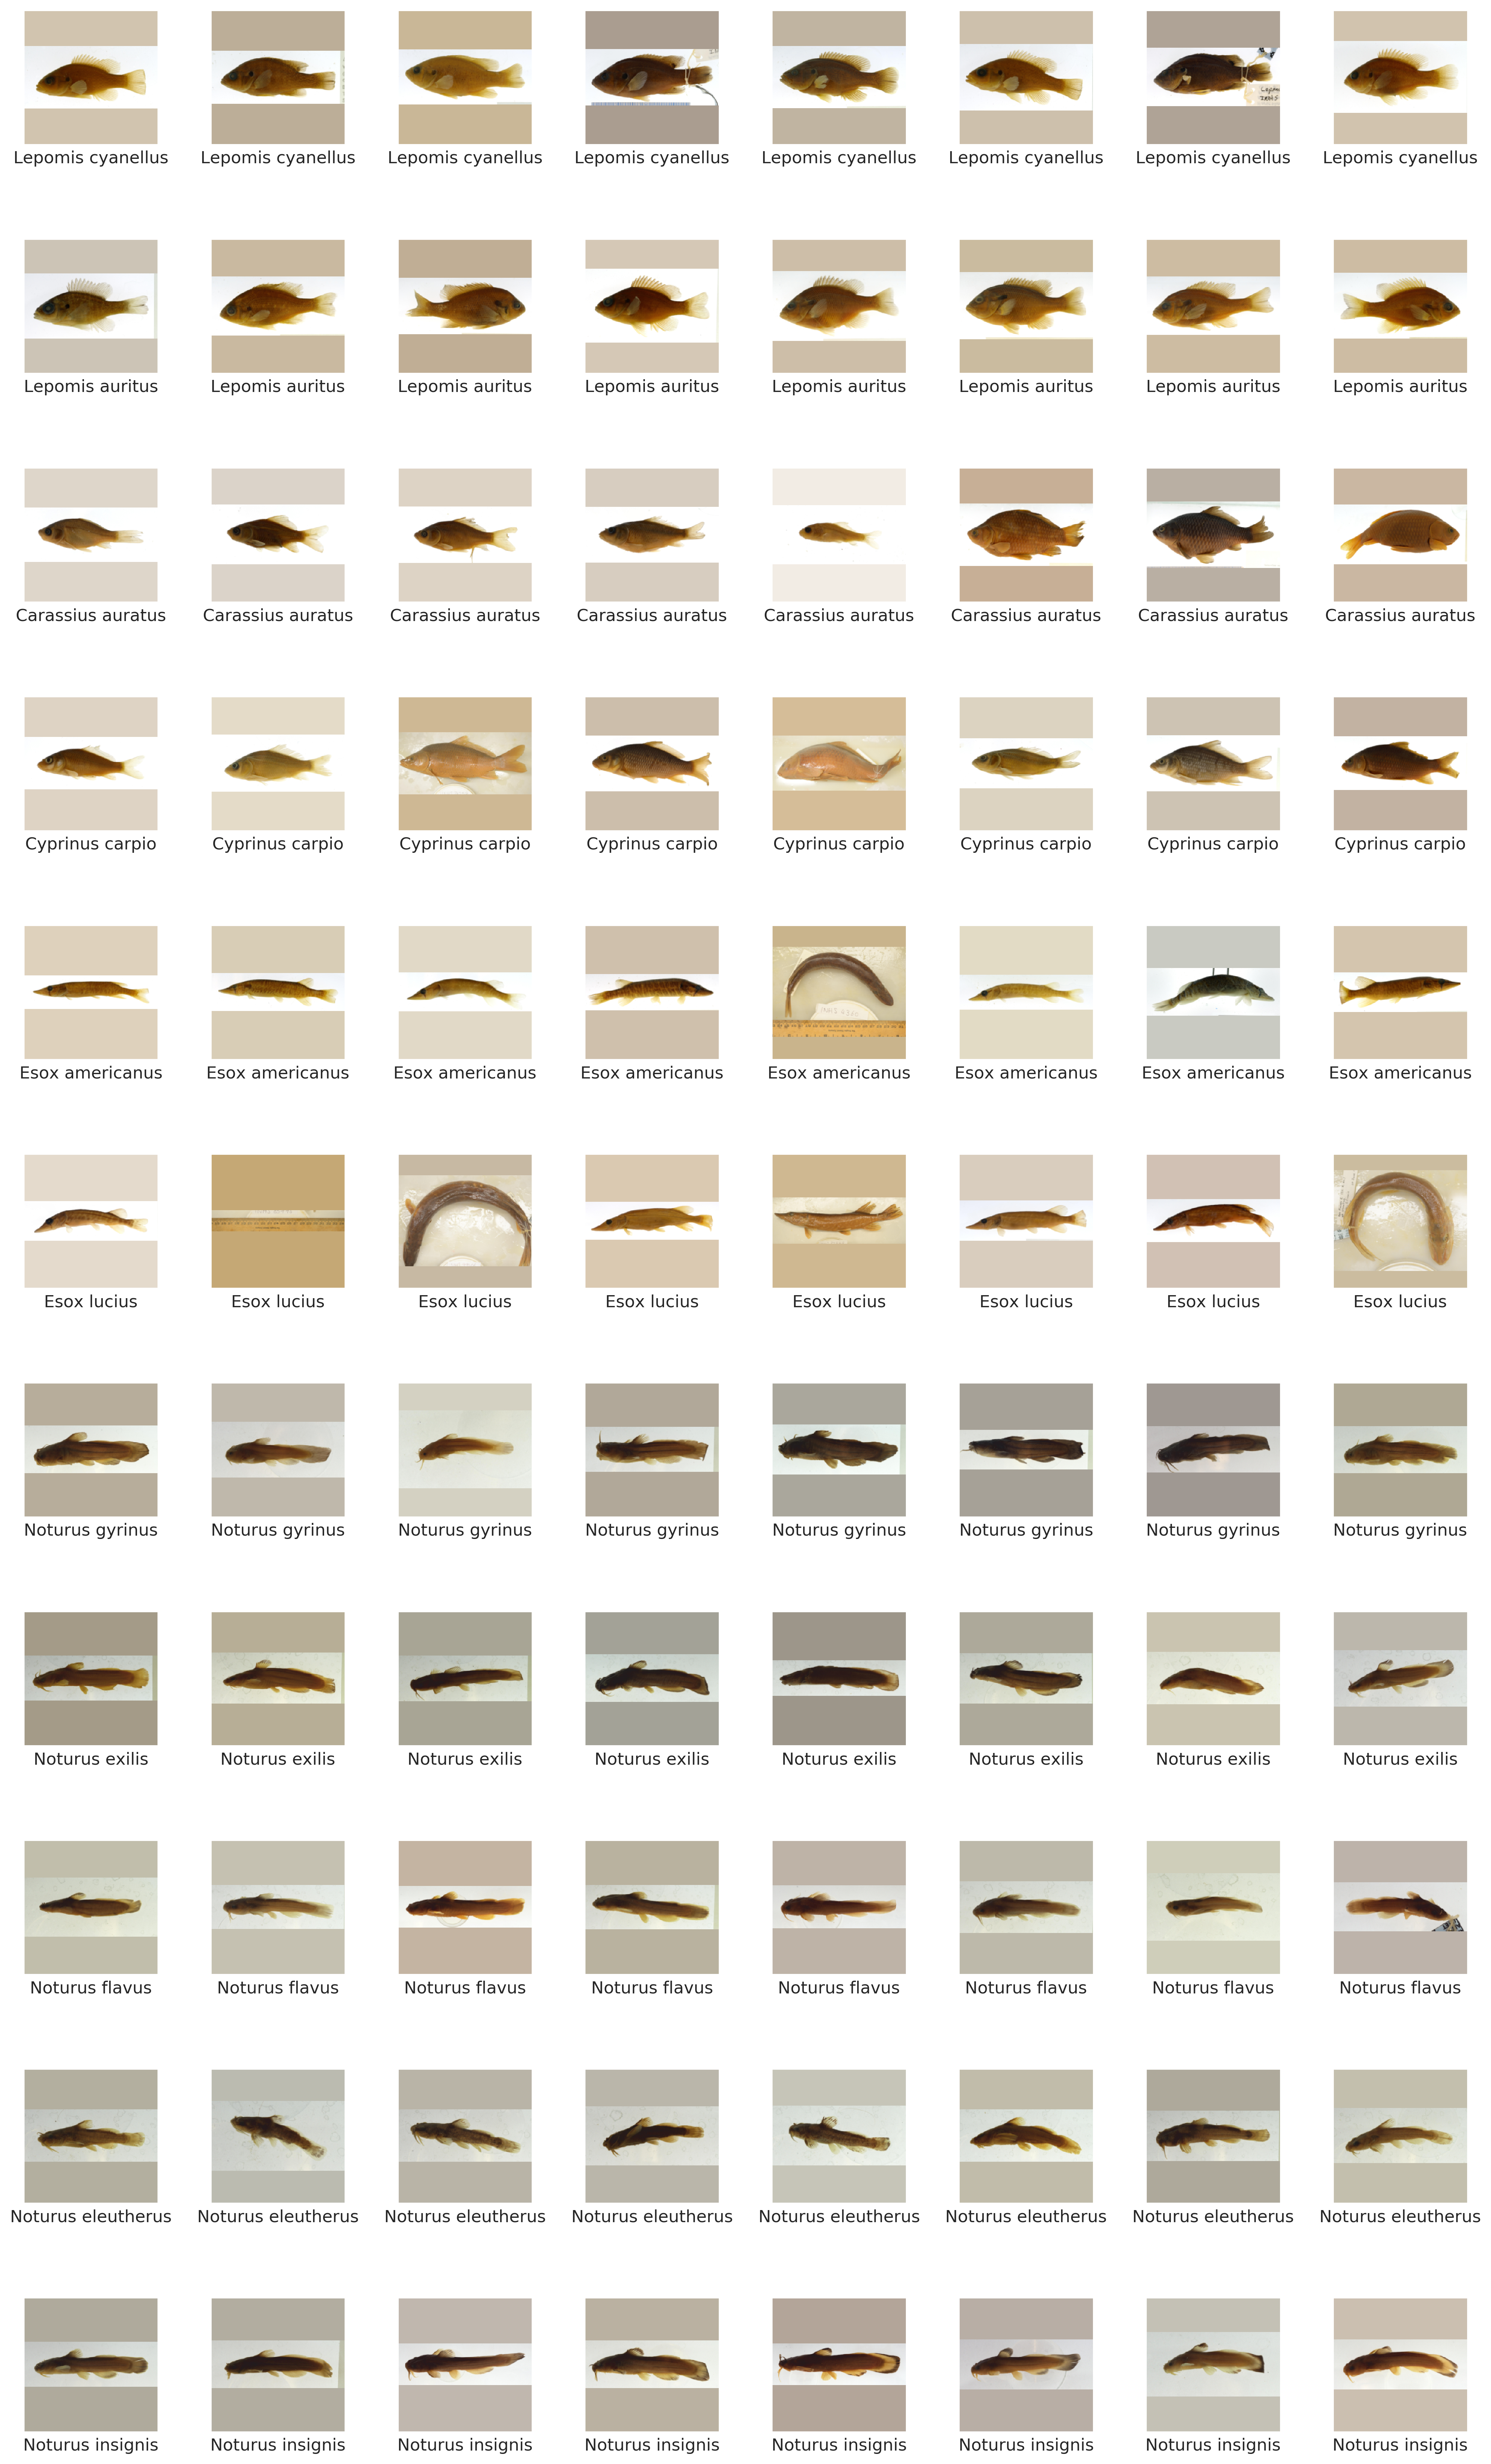

In [32]:
%matplotlib inline

import math
import random

# Parameters: show images of certain species
species_index = speciesList
num_species = len(species_index)
print(species_index)
limit_per_species = 8
number_per_row = 8

img_indexes = []
for i in species_index:
    randomList = random.sample(dataset.getSpeciesIndices(i), k=limit_per_species)
    print(i, randomList)
    img_indexes = img_indexes + randomList
img_count = len(img_indexes)
# print(img_indexes)

# Plot

n_rows = math.ceil(img_count/number_per_row)
fig, axes = plt.subplots(n_rows, number_per_row, figsize=(15, 2.5*n_rows), dpi= 300)


out_index = 0
in_index = 0
for i, ax in enumerate(axes.flat):
    if i < img_count and i < limit_per_species*num_species:
        
        augmentation, normalization = dataset.toggle_image_loading(augmentation=False, normalization=False)
        obj = dataset[img_indexes[i]]
        image = obj["image"].squeeze()
        dataset.toggle_image_loading(augmentation, normalization)
        
        speciesName = dataset.getSpeciesOfIndex(obj["species"])
        ax.set_xlabel(speciesName)

        n_channels = params["n_channels"]
        if n_channels != 1:
                image = image.permute(1, 2, 0)
                
        ax.imshow(image.cpu().detach().numpy())
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        break
        
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()